In [1]:
print("Start")
# Import necessary dependencies
from pfu_transit.mask_generation import generate_star, generate_exoplanet
from pfu_transit.photometry_simulation import photometric_observation
# Standard imports
import matplotlib.pyplot as plt
import numpy as np
import warnings
import astropy.constants as c
warnings.filterwarnings("ignore")
print("Imports loaded")

# EXOPLANET (based on HD189733b)
exoplanet_mask = generate_exoplanet(wavelength=0.5, planet_radius = 1.1*c.R_jup/c.R_sun, b=0.5)

# STAR
star_mask = generate_star(wavelength=0.5, stellar_radius = 0.8, stellar_temperature=4800, stellar_oblateness = 0)

np.savez("transit_masks", exoplanet_mask, star_mask)

Start
Imports loaded
Convolving mask....
Obtaining atmosphere...


100%|████████████████████████████████████████████████████████████████████████████████| 186/186 [00:19<00:00,  9.63it/s]


Creating mask...


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:01<00:00, 163.59it/s]


Calculating limb darkening coefficients....


100%|████████████████████████████████████████████████████████████████████████████| 1329/1329 [00:00<00:00, 1882.17it/s]


Creating mask...


100%|█████████████████████████████████████████████████████████████████████████████| 1329/1329 [00:09<00:00, 147.60it/s]


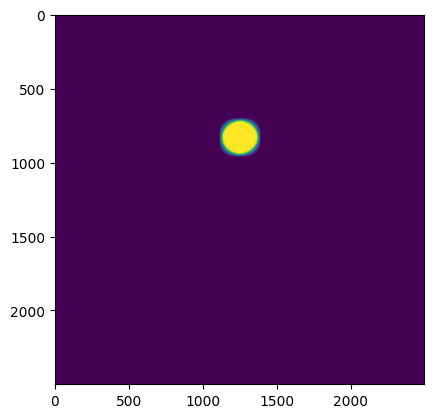

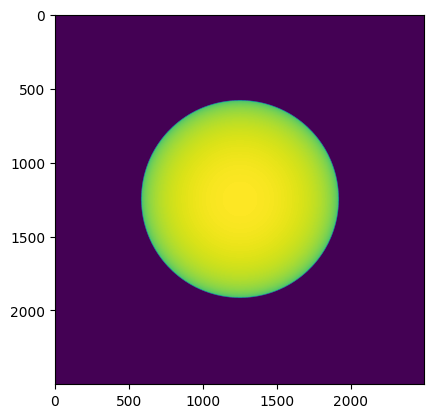

In [2]:
masks = np.load("transit_masks.npz")
exoplanet_mask = masks["arr_0"]
star_mask = masks["arr_1"]

plt.imshow(exoplanet_mask)
plt.show()

plt.imshow(star_mask)
plt.show()

In [3]:
image_directory = r"C:\Users\mmc\Music\exoplanet_images"

# velocity is for HD189733b
times, flux = photometric_observation(star_mask, exoplanet_mask,velocity=0.78, step=1)

100%|██████████████████████████████████████████████████████████████████████████████| 2219/2219 [00:31<00:00, 69.69it/s]


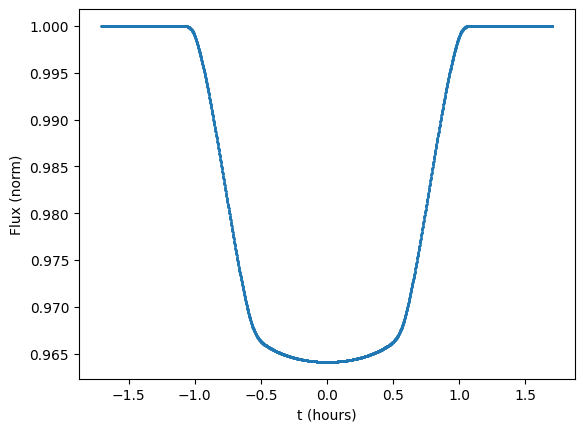

In [5]:
plt.scatter(times - np.median(times), flux/flux[0], s=1)
plt.ylabel("Flux (norm)")
plt.xlabel("t (hours)")
plt.show()